In [1]:
# Basic Classification: classifying clothes "tensorflow" 

In [2]:
# Adding libraries

import tensorflow as tf
from tensorflow import keras

import numpy as np                   # mathematical operations
import matplotlib.pyplot as plt      # plotting 

In [3]:
print(tf.__version__)

2.1.0


In [4]:
################# Data ###########################

fashion_dataset = keras.datasets.fashion_mnist
(train_images, train_labels) , (test_images, test_labels) = fashion_dataset.load_data()    # train/test images, train/test labels

In [5]:
# corresponding label names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_images)

10000

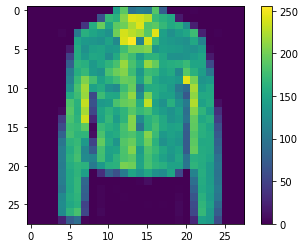

In [9]:
plt.figure()
plt.imshow(test_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# Preprocessing of the data
train_images = train_images/255.0
test_images = test_images/255.0

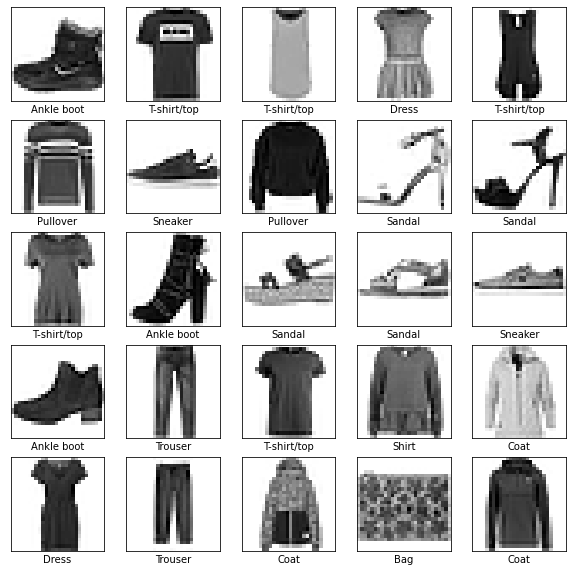

In [11]:
plt.figure(figsize= (10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    
plt.show()

In [12]:
#Create a model, which in this case is simple Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)) ,
    keras.layers.Dense(128, activation = 'relu') ,
    keras.layers.Dense(10)
])

In [13]:
#Compilation of the model
model.compile(optimizer = "adam" ,
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics=["accuracy"])

In [14]:
model.fit(train_images, train_labels, epochs =10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.5000 - accuracy: 0.8253
Epoch 2/10
60000/60000 [==============================] - ETA: 0s - loss: 0.3756 - accuracy: 0.86 - 2s 33us/sample - loss: 0.3754 - accuracy: 0.8651
Epoch 3/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3380 - accuracy: 0.8774
Epoch 4/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3143 - accuracy: 0.8852
Epoch 5/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2945 - accuracy: 0.8899
Epoch 6/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2820 - accuracy: 0.8962
Epoch 7/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2695 - accuracy: 0.8993
Epoch 8/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.2581 - accuracy: 0.9039
Epoch 9/10
60000/60000 [==============================] - 2s 34us/sample - loss

In [15]:
#Evaluation
test_loss, test_acccuracy = model.evaluate(test_images, test_labels, verbose =2 )

10000/10000 - 0s - loss: 0.3222 - accuracy: 0.8855


In [16]:
print( "Test accuracy:" + str( test_acccuracy ))

Test accuracy:0.8855


In [17]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [18]:
predictions = probability_model.predict(test_images)

In [19]:
predictions[0]

array([1.74596494e-07, 3.44570914e-08, 3.37935973e-08, 1.16548216e-10,
       9.85168072e-08, 4.84590186e-03, 7.82926122e-07, 1.34306345e-02,
       2.91420889e-07, 9.81722057e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [22]:
test_labels[0]

9

In [30]:
def plot_image(i, prediction_arrays, true_labels, img):
    true_label, img = true_labels[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap =plt.cm.binary)
    
    predicted_label = np.argmax(prediction_arrays)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
        
        
    plt.xlabel("{} {}% ({})".format(class_names[predicted_label], 100* np.max(prediction_arrays),class_names[true_label]),color= color)
    
    
    
def plot_value_array(i, prediction_arrays, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction_arrays, color ='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(prediction_arrays)
    
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

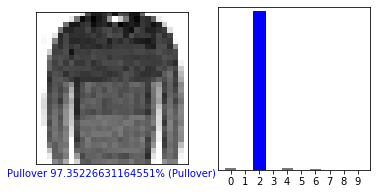

In [33]:
i = 20
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

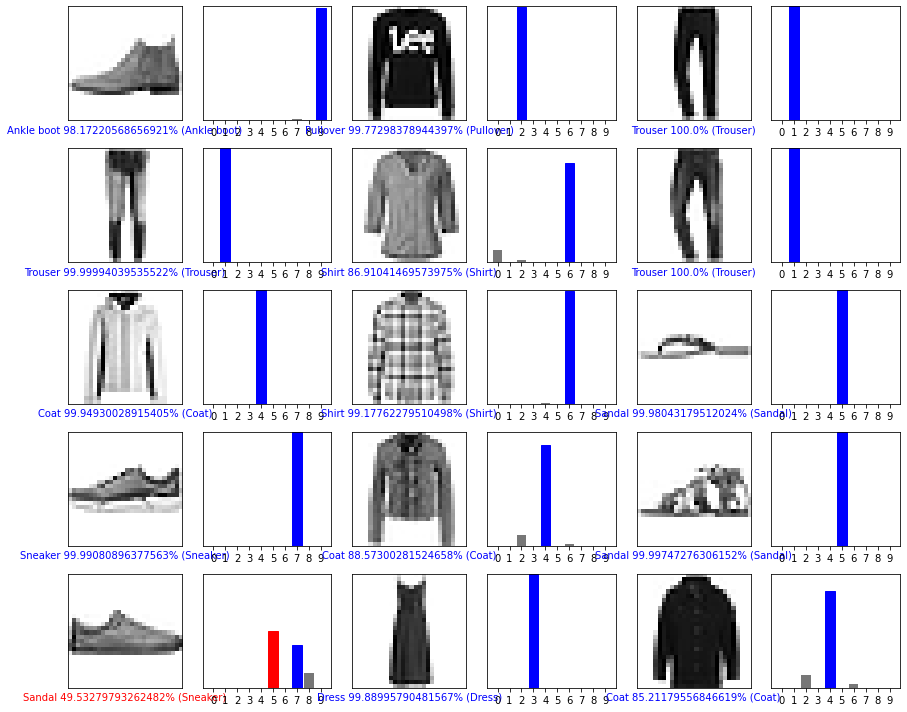

In [34]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()